In [1]:
c = [0.00,1.00,2.00,3.00,3.64,4.24,4.55,4.80,5.10,5.45,6.00,7.00,8.00] # concentration denaturant
y = [100,112,131,150,170,220,300,400,500,600,720,765,785] # signal

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import math

Text(0, 0.5, 'Signal')

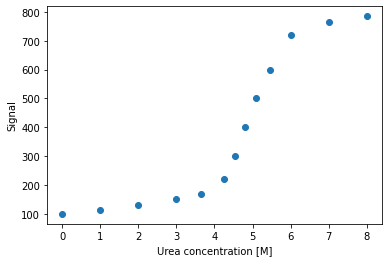

In [5]:
# plot concentration vs. signal
plt.plot(c,y,marker='o',linestyle='None')
plt.xlabel('Urea concentration [M]')
plt.ylabel('Signal')

In [10]:
# linear fit of folded and unfolded regions
coef = np.polyfit(c[:4],y[:4],1)
poly1d_fn = np.poly1d(coef)

coef2 = np.polyfit(c[-2:],y[-2:],1)
poly1d_fn2 = np.poly1d(coef2)

Text(0, 0.5, 'Signal')

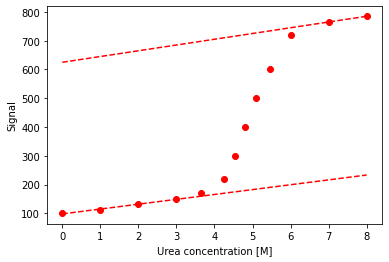

In [12]:
plt.plot(c,y,marker='o',color='r',linestyle='None')
plt.plot(c,poly1d_fn(c),'r--')
plt.plot(c,poly1d_fn2(c),'r--')
plt.xlabel('Urea concentration [M]')
plt.ylabel('Signal')

In [17]:
slope, intercept = np.polyfit(c[:4],y[:4],1)
print(slope, intercept)

16.89999999999999 97.90000000000002


In [18]:
slope2, intercept2 = np.polyfit(c[-2:],y[-2:],1)
print(slope2, intercept2)

19.999999999999847 625.0000000000011


In [30]:
# equation for linear region of folded (N) and unfolded state (U)
yN = [16.9 * x + 97.9 for x in c]
yU = [20.0 * x + 625.0 for x in c]
print(yN)
print(yU)

[97.9, 114.80000000000001, 131.7, 148.6, 159.416, 169.55599999999998, 174.79500000000002, 179.01999999999998, 184.08999999999997, 190.005, 199.3, 216.2, 233.1]
[625.0, 645.0, 665.0, 685.0, 697.8, 709.8, 716.0, 721.0, 727.0, 734.0, 745.0, 765.0, 785.0]


In [46]:
# calculation of equilibrium constant for values outside of N and U, which is equal to the ratio of [U] over [N]
K = [(x - yN[y.index(x)])/(yU[y.index(x)] - x) for x in y[5:12] if (yU[y.index(x)]-x)!=0 ]
print([yU[y.index(x)]-x for x in y[5:12]])

[489.79999999999995, 416.0, 321.0, 227.0, 134.0, 25.0, 0.0]


In [39]:
# calculate natural logarithm of K
print(K)
print(math.log(math.e))
lnK = [math.log(x) for x in K]

[0.10298897509187428, 0.30097355769230766, 0.6884112149532711, 1.3916740088105728, 3.0596641791044776, 20.828000000000003]
1.0


In [59]:
# calculate change in free energy according to delta G = - R T lnK
deltaG = [-8.314 * 298 * x for x in lnK]
print(deltaG)

[5631.851501636626, 2974.9021290009723, 925.0483903974431, -818.8557447891326, -2770.681563147272, -7522.647491430309]


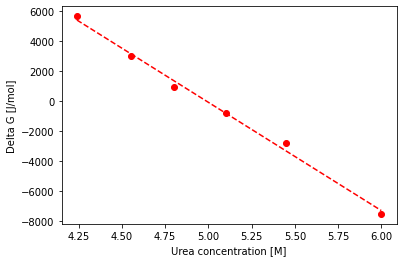

In [69]:
# plot concentration vs delta G
plt.plot(c[5:11],deltaG,marker='o',color='r',linestyle='None')
plt.xlabel('Urea concentration [M]')
plt.ylabel('Delta G [J/mol]')
coef3 = np.polyfit(c[5:11],deltaG,1)
poly1d_fn3 = np.poly1d(coef3)
plt.plot(c[5:11],poly1d_fn3(c[5:11]),'r--')

In [66]:
# extract m eq and delta G for 0M of denaturant from slope and intercept 
m, dG_0M = np.polyfit(c[5:11],deltaG,1)
print(m, dG_0M)

-7203.54153180265 35922.39316503337


In [68]:
D_half = -dG_0M/m
print(D_half)

4.986768384195596
